In [ ]:
# ==========================================
# PASO 1: INSTALACIÓN DE LIBRERÍAS Y CARGA
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import re
from google.colab import files
import io

In [ ]:
print("Paso 1: Librerías cargadas correctamente.")

Paso 1: Librerías cargadas correctamente.


In [ ]:
# ==========================================
# PASO 2: SUBIR EL ARCHIVO
# ==========================================
print("\n--- POR FAVOR, SUBE TU ARCHIVO CSV AHORA ---")
uploaded = files.upload()




--- POR FAVOR, SUBE TU ARCHIVO CSV AHORA ---


Saving Analisis texto 2.xlsx to Analisis texto 2.xlsx


In [ ]:
# Obtener el nombre del archivo subido
filename = next(iter(uploaded))

In [ ]:
# Leer el archivo (asumiendo que es un archivo Excel)
try:
    df = pd.read_excel(io.BytesIO(uploaded[filename]))
except Exception as e:
    print(f"Error al leer el archivo Excel: {e}")
    # Fallback si read_excel falla por alguna razón inesperada o para otros tipos de archivos
    # Aunque en este caso, el error original es por intentar leer XLSX como CSV
    # Para una solución más robusta, se podría verificar la extensión antes de intentar leer
    try:
        df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1') # Intentar con otra codificación para CSV
    except Exception as e_csv:
        print(f"Error al leer como CSV: {e_csv}")
        print("No se pudo leer el archivo con las codificaciones predeterminadas. Por favor, asegúrate de que el archivo sea un CSV o un Excel válido.")
        df = pd.DataFrame() # Crear un DataFrame vacío para evitar errores posteriores

if not df.empty:
    print(f"Archivo '{filename}' cargado exitosamente con {len(df)} filas.")
else:
    print(f"No se pudo cargar el archivo '{filename}'. El DataFrame está vacío.")

Archivo 'Analisis texto 2.xlsx' cargado exitosamente con 178 filas.


In [ ]:
# ==========================================
# PASO 3: DEFINICIÓN DE FUNCIONES DE LIMPIEZA
# ==========================================

def normalizar_texto(text):
    """Limpia tildes, mayúsculas y caracteres especiales"""
    if not isinstance(text, str):
        return ""
    # Normalizar unicode (quitar tildes)
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    # Minúsculas
    return text.lower()

def categorizar_esfuerzo(text):
    """Asigna una categoría basada en palabras clave encontradas en el análisis"""
    if not isinstance(text, str) or len(text) < 2:
        return 'Sin Respuesta'

    text_norm = normalizar_texto(text)

    # Lógica de categorización (Basada en el análisis previo)
    if len(text_norm) < 4 and ('no' in text_norm or 'ok' in text_norm or '*' in text_norm):
         return 'Ninguna / Todas Aportan Valor'

    if any(x in text_norm for x in ['coa', 'auditoria', 'audit']):
        return 'COA / Auditorías'
    if any(x in text_norm for x in ['timesoft', 'time', 'soft', 'nomina', 'horario', 'marcacion', 'horas extra']):
        return 'TimeSoft / Gestión Nómina'
    if any(x in text_norm for x in ['encuesta', 'forms', 'form', 'link', 'planilla', 'formato', 'levantamiento', 'recoleccion']):
        return 'Encuestas / Formularios'
    if any(x in text_norm for x in ['reunion']):
        return 'Reuniones'
    if any(x in text_norm for x in ['foto', 'video', 'evidencia', 'camara']):
        return 'Fotos / Videos'
    if any(x in text_norm for x in ['correo', 'mail', 'bandeja']):
        return 'Revisión de Correos'
    if any(x in text_norm for x in ['whatsapp', 'celular', 'chat', 'grupo']):
        return 'WhatsApp / Celular'
    if any(x in text_norm for x in ['inventario', 'stock', 'quiebra']):
        return 'Inventarios'
    if any(x in text_norm for x in ['informe', 'reporte', 'consolidado', 'kpi']):
        return 'Informes / Reportes'
    if any(x in text_norm for x in ['administrativa', 'oficina', 'papel']):
        return 'Tareas Administrativas'
    if any(x in text_norm for x in ['area', 'solicitud', 'gestion']):
        return 'Gestión con Áreas'
    if any(x in text_norm for x in ['todas', 'todo', 'importante', 'necesarias', 'ninguna', 'no ']):
        return 'Ninguna / Todas Aportan Valor'

    return 'Otras'

In [ ]:
# ==========================================
# PASO 4: EJECUCIÓN DEL ANÁLISIS
# ==========================================

columna_objetivo = "¿En qué tareas sientes que inviertes más esfuerzo y no aportan tanto valor?"

# Verificar si la columna existe
if columna_objetivo in df.columns:
    print("\nProcesando la columna...")
    # Aplicar la categorización
    df['Categoria_Esfuerzo'] = df[columna_objetivo].apply(categorizar_esfuerzo)

    # Mostrar resultados preliminares
    conteo = df['Categoria_Esfuerzo'].value_counts()
    print("\nTop 5 Categorías encontradas:")
    print(conteo.head())


Procesando la columna...

Top 5 Categorías encontradas:
Categoria_Esfuerzo
Encuestas / Formularios          50
Ninguna / Todas Aportan Valor    21
COA / Auditorías                 20
TimeSoft / Gestión Nómina        18
Gestión con Áreas                16
Name: count, dtype: int64


/tmp/ipython-input-1816960474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Categoria_Esfuerzo', data=df,


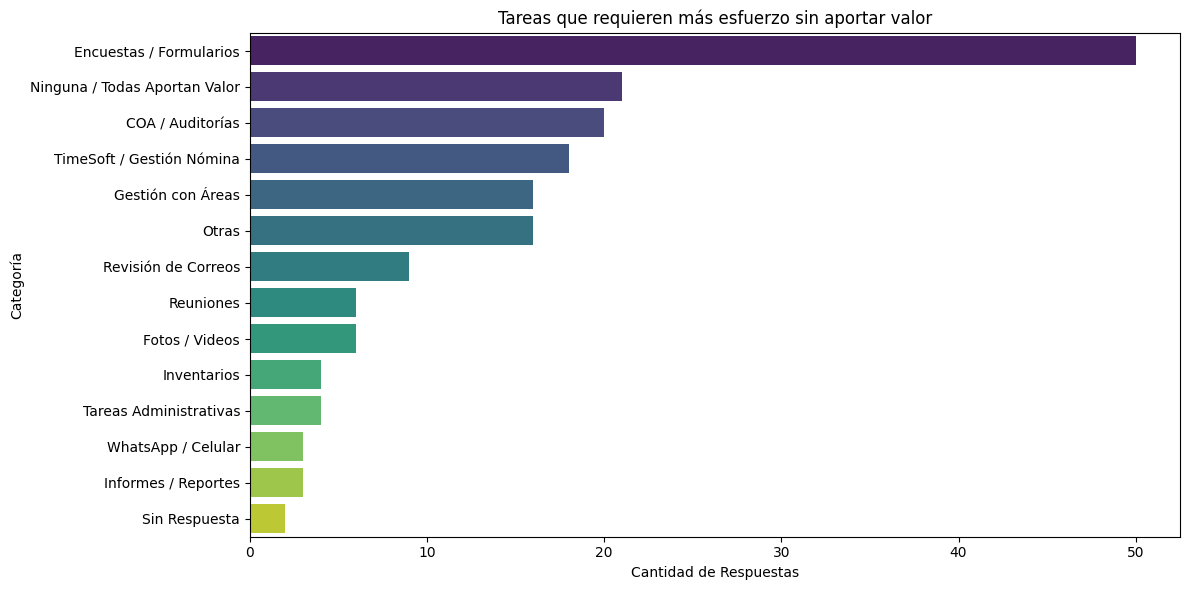

In [ ]:
# ==========================================
# PASO 5: GRAFICAR RESULTADOS
# ==========================================
plt.figure(figsize=(12, 6))
sns.countplot(y='Categoria_Esfuerzo', data=df,
              order=df['Categoria_Esfuerzo'].value_counts().index,
              palette='viridis')
plt.title('Tareas que requieren más esfuerzo sin aportar valor')
plt.xlabel('Cantidad de Respuestas')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show() # Muestra el gráfico en pantalla

In [ ]:
# ==========================================
# PASO 6: DESCARGAR ARCHIVO PROCESADO (XLSX)
# ==========================================

# Re-check the condition since this is a new cell execution context
if columna_objetivo in df.columns:
    nombre_salida = "Analisis_Categorizado.xlsx"

    # Exportar a Excel (sin incluir el índice numérico)
    df.to_excel(nombre_salida, index=False)

    files.download(nombre_salida)
    print(f"\n¡Listo! Se ha descargado el archivo Excel: {nombre_salida}")
else:
    print(f"ERROR: No se encontró la columna '{columna_objetivo}'. Verifica el nombre en tu archivo.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¡Listo! Se ha descargado el archivo Excel: Analisis_Categorizado.xlsx


In [ ]:
# ==========================================
# PASO 1-COLUMNA PRIORIZACIÓN: DEFINIR LÓGICA DE SEPARACIÓN
# ==========================================

def separar_prioridades(texto):
    """
    Busca palabras clave para dividir el texto en dos partes:
    lo prioritario y lo que se deja para después.
    """
    if not isinstance(texto, str):
        return pd.Series([None, None])

    texto_clean = texto.lower().strip()

    # Expresión regular con todas las variantes que usan las personas para decir "luego"
    # Detecta: "para despues", "despues", "luego", "por ultimo", "menos prioridad", "puede esperar", etc.
    patron_corte = r"\b(?:para\s+despu[ée]s|despu[ée]s|por\s+[úu]ltimo|luego|quedan\s+para|y\s+las\s+que\s+suelo\s+dejar|segunda\s+prioridad|pero\s+a\s+veces|puede\s+esperar|menos\s+prioridad|quedan\s+pendientes|suelo\s+dejar\s+para)\b"

    # Dividimos el texto en 2 partes usando el patrón
    partes = re.split(patron_corte, texto_clean, maxsplit=1)

    prioridad = partes[0].strip()
    aplazado = partes[1].strip() if len(partes) > 1 else "No especificado / Nada"

    # --- LIMPIEZA ADICIONAL ---

    # Quitar palabras "basura" al inicio de la prioridad (ej: "Prioridad: ...")
    prioridad = re.sub(r"^(prioritarias|prioridad|importante|siempre como prioridad|actividades prioritarias?|1)[\s:;\-.]*", "", prioridad).strip()
    # Quitar conectores sueltos al final de la prioridad (ej: "tarea 1, tarea 2 y")
    prioridad = re.sub(r"[\s,;y]+$", "", prioridad)

    # Quitar puntuación al inicio de lo aplazado
    aplazado = re.sub(r"^[\s,;:\-\.]+", "", aplazado) # Corrección: debe ser 'aplazado'

    return pd.Series([prioridad, aplazado])

In [ ]:
# ==========================================
# PASO 3: EJECUTAR ANÁLISIS
# ==========================================

# Buscamos la columna correcta (a veces tiene espacios o saltos de línea al final)
col_candidatas = [c for c in df.columns if "prioritarias" in c.lower()]

if col_candidatas:
    col_objetivo = col_candidatas[0]
    print(f"\nProcesando columna: '{col_objetivo}'...")

    # Aplicar la función y crear las dos columnas nuevas
    df[['Actividades_priorizadas', 'Actuvidades_aplazadas']] = df[col_objetivo].apply(separar_prioridades)

    print("\n¡Proceso completado! Vista previa:")
    print(df[['Actividades_priorizadas', 'Actuvidades_aplazadas']].head())

    # ==========================================
    # PASO 4: DESCARGAR ARCHIVO FINAL (XLSX)
    # ==========================================
    nombre_archivo = "Analisis_Prioridades.xlsx"
    df.to_excel(nombre_archivo, index=False)
    files.download(nombre_archivo)
    print(f"\nArchivo descargado: {nombre_archivo}")

else:
    print("\nERROR: No se encontró la columna de actividades prioritarias. Verifica el nombre en tu Excel.")


Procesando columna: '¿Qué actividades consideras prioritarias en tus visitas y cuáles suelen quedar para después?
'...

¡Proceso completado! Vista previa:
                             Actividades_priorizadas  \
0                      los controles, ajustde tienda   
1  dejar tareas, ajustar novedades y realizar coa...   
2    las correcciones de tienda y gestion de correos   
3  recorrido a sala de ventas y respectivas tarea...   
4  , personal, dinero, aseo, saneo, revision de f...   

                               Actuvidades_aplazadas  
0               coa de enfoque, revisión de timesoft  
1                                   algunos correos.  
2                                  ajustes timesoft.  
3  la revision del correo ara comunicaciones y co...  
4                             No especificado / Nada  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Archivo descargado: Analisis_Prioridades.xlsx


In [ ]:
# ==========================================
# FUNCIÓN DE LIMPIEZA Y CATEGORIZACIÓN
# ==========================================

def normalizar(text):
    """Quita tildes y pone en minúsculas para facilitar la búsqueda"""
    if not isinstance(text, str):
        return ""
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8').lower()

def categorizar_prioridad(text):
    """Clasifica qué es lo más importante para el líder"""
    if not isinstance(text, str) or len(text) < 3:
        return 'Sin Información'

    t = normalizar(text)

    # 1. Operación en Piso (Lo más común: Pasillo 1, básicos, limpieza, producto)
    if any(x in t for x in ['recorrido', 'pasillo', 'sala', 'piso', 'tienda', 'visita', 'vuelta', 'caminar']):
        return 'Recorrido / Piso de Venta'
    if any(x in t for x in ['basico', 'estandar', 'limpieza', 'aseo', 'orden', 'surtido', 'disponibilidad', 'exhibi', 'fruver', 'saneo', 'imagen', 'calidad', 'precio', 'etiqueta']):
        return 'Estándares Operativos y Básicos'

    # 2. Gestión Humana
    if any(x in t for x in ['personal', 'equipo', 'gente', 'clima', 'colaborador', 'staff', 'entrenamiento', 'capacita', 'retroalimenta', 'feedback', 'hablar']):
        return 'Gestión de Equipos / Personas'

    # 3. Negocio e Indicadores
    if any(x in t for x in ['indicador', 'kpi', 'venta', 'presupuesto', 'cifra', 'numero', 'meta', 'negocio', 'dinero', 'caja']):
        return 'Estrategia e Indicadores'

    # 4. Procesos Específicos
    if any(x in t for x in ['coa', 'auditoria', 'checklist', 'control', 'proceso']):
        return 'COA / Auditorías'

    # 5. Administrativo (Si alguien prioriza esto es atípico, pero sucede)
    if any(x in t for x in ['correo', 'admin', 'oficina', 'informe', 'reporte']):
        return 'Administrativo / Correos'

    return 'Otras Prioridades'

def categorizar_aplazado(text):
    """Clasifica qué se deja para después"""
    if not isinstance(text, str):
        return 'No Especificado'

    t = normalizar(text)

    # Casos donde no se aplaza nada o está vacío
    if len(t) < 4 or any(x in t for x in ['nada', 'no especificado', 'ningun', 'todo se hace']):
        return 'Nada / No Especificado'

    # 1. Tareas de Oficina / Administrativas
    if any(x in t for x in ['admin', 'oficina', 'papel', 'escritorio', 'legaliza', 'archivo', 'document']):
        return 'Tareas Administrativas'

    # 2. Comunicación Digital
    if any(x in t for x in ['correo', 'mail', 'bandeja', 'mensaje', 'llamada']):
        return 'Revisión de Correos'

    # 3. Sistemas y Nómina
    if any(x in t for x in ['timesoft', 'nomina', 'malla', 'horario', 'sistema', 'pc', 'computador']):
        return 'Sistemas / TimeSoft'

    # 4. Espacios No Comerciales
    if any(x in t for x in ['bodega', 'trastienda', 'recibo', 'inventario', 'stock']):
        return 'Bodega / Inventarios'

    # 5. Reportes
    if any(x in t for x in ['informe', 'reporte', 'analisis', 'dato']):
        return 'Elaboración de Informes'

    return 'Otros (Operativo Menor)'

In [ ]:
# ==========================================
# EJECUCIÓN
# ==========================================

print("Aplicando categorización a las nuevas columnas...")

# Asegurarnos de que las columnas existen (del paso anterior)
if 'Actividades_priorizadas' in df.columns:
    df['Categoria_Priorizada'] = df['Actividades_priorizadas'].apply(categorizar_prioridad)
    df['Categoria_Aplazada'] = df['Actuvidades_aplazadas'].apply(categorizar_aplazado)

    # Vista previa
    print("\n--- EJEMPLO DE RESULTADOS ---")
    print(df[['Actividades_priorizadas', 'Categoria_Priorizada', 'Actuvidades_aplazadas', 'Categoria_Aplazada']].head(10))

    # Resumen Estadístico
    print("\n--- RESUMEN: ¿QUÉ SE PRIORIZA? ---")
    print(df['Categoria_Priorizada'].value_counts())

    print("\n--- RESUMEN: ¿QUÉ SE APLAZA? ---")
    print(df['Categoria_Aplazada'].value_counts())

Aplicando categorización a las nuevas columnas...

--- EJEMPLO DE RESULTADOS ---
                             Actividades_priorizadas  \
0                      los controles, ajustde tienda   
1  dejar tareas, ajustar novedades y realizar coa...   
2    las correcciones de tienda y gestion de correos   
3  recorrido a sala de ventas y respectivas tarea...   
4  , personal, dinero, aseo, saneo, revision de f...   
5                           correo, ajuste, telefono   
6  revisión de pasillo 1, revisión de indicadores...   
7  recorrido en la tienda,  arqueos a caja fuerte...   
8  actividades de pasillo . ajustes sap y revisio...   
9  revisión operativa tienda, reacción a caja, at...   

              Categoria_Priorizada  \
0        Recorrido / Piso de Venta   
1        Recorrido / Piso de Venta   
2        Recorrido / Piso de Venta   
3        Recorrido / Piso de Venta   
4  Estándares Operativos y Básicos   
5         Administrativo / Correos   
6        Recorrido / Piso de Venta  

In [ ]:
# ==========================================
# DESCARGA DEL ARCHIVO FINAL
# ==========================================
# Re-check the condition (or assume previous steps ran correctly)
if 'Actividades_priorizadas' in df.columns:
    nombre_final = "Analisis_Completo_Categorizado.xlsx"
    df.to_excel(nombre_final, index=False)
    print(f"\nGenerando archivo final: {nombre_final}...")
    files.download(nombre_final)
    print("¡Descarga iniciada!")
else:
    print("ERROR: No se encontraron las columnas 'Actividades_priorizadas'. Asegúrate de haber ejecutado el script del paso anterior.")


Generando archivo final: Analisis_Completo_Categorizado.xlsx...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¡Descarga iniciada!


In [ ]:
# ==========================================
# PASO DEFINIR CATEGORÍAS DE GUSTOS
# ==========================================

def normalizar(text):
    if not isinstance(text, str):
        return ""
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8').lower()

def categorizar_gustos(text):
    """Clasifica las tareas que más disfrutan los colaboradores"""
    if not isinstance(text, str) or len(text) < 3:
        return 'Sin Respuesta'

    t = normalizar(text)

    # 1. GESTIÓN DE EQUIPOS (Lo más humano)
    # Palabras clave: enseñar, equipo, gente, personal, acompañar, liderar
    if any(x in t for x in ['enseñar', 'ensenar', 'equipo', 'personal', 'gente', 'colaborador', 'acompañar', 'acompanar', 'liderar', 'capacitar', 'formar', 'interaccion', 'socializar']):
        return 'Gestión de Equipos y Enseñanza'

    # 2. ANÁLISIS Y ESTRATEGIA (Lo numérico)
    # Palabras clave: indicadores, ventas, kpi, números, estrategia, análisis, meta
    if any(x in t for x in ['indicador', 'venta', 'kpi', 'numeros', 'cifras', 'analisis', 'estrategia', 'meta', 'presupuesto', 'resultado', 'negocio']):
        return 'Análisis de Indicadores y Ventas'

    # 3. OPERACIÓN Y CAMPO (La acción física)
    # Palabras clave: recorrido, piso, tienda, sala, exhibición, fruver, mercadeo
    if any(x in t for x in ['recorrido', 'piso', 'tienda', 'sala', 'operacion', 'estandar', 'exhibi', 'visual', 'fruver', 'mercadeo', 'surtir', 'visita', 'campo']):
        return 'Operación y Recorrido en Tienda'

    # 4. AUDITORÍA Y CONTROL (La revisión)
    # Palabras clave: coa, control, auditoría, revisión, checklist
    if any(x in t for x in ['coa', 'control', 'auditoria', 'revision', 'seguimiento', 'checklist', 'supervisar']):
        return 'Auditoría y Control (COA)'

    # 5. GENERAL
    if any(x in t for x in ['todo', 'rol', 'cargo', 'general']):
        return 'Todo / El Rol General'

    return 'Otras'


Procesando columna: ¿ Que tareas te gustan más ?...

--- ¿QUÉ ES LO QUE MÁS DISFRUTAN? ---
Categoria_Gustos
Gestión de Equipos y Enseñanza      69
Análisis de Indicadores y Ventas    47
Operación y Recorrido en Tienda     38
Auditoría y Control (COA)           12
Otras                                9
Todo / El Rol General                3
Name: count, dtype: int64


/tmp/ipython-input-1522628619.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Categoria_Gustos', data=df, order=conteo.index, palette='pastel')


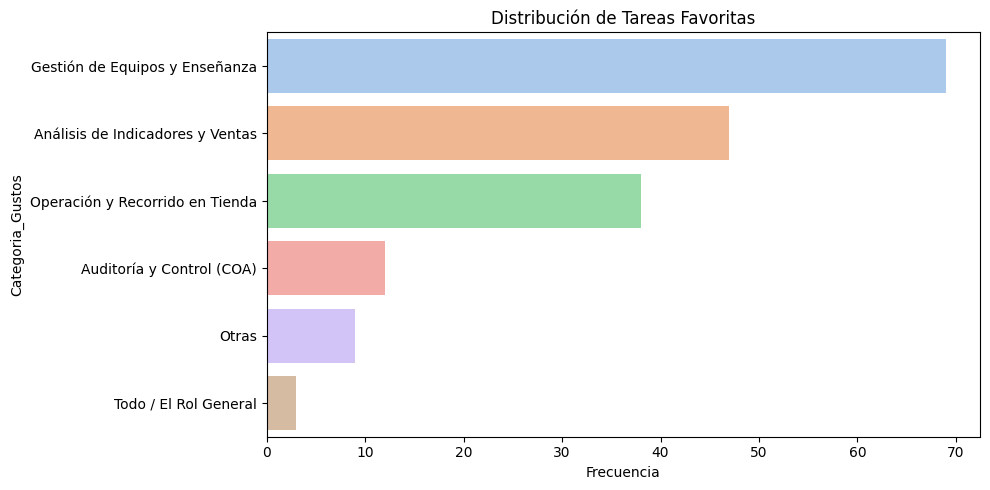

In [ ]:
# ==========================================
# PASO 3: APLICAR Y VISUALIZAR
# ==========================================

col_gustos = "¿ Que tareas te gustan más ?"

if col_gustos in df.columns:
    print(f"\nProcesando columna: {col_gustos}...")

    # Crear nueva columna
    df['Categoria_Gustos'] = df[col_gustos].apply(categorizar_gustos)

    # Mostrar conteo
    conteo = df['Categoria_Gustos'].value_counts()
    print("\n--- ¿QUÉ ES LO QUE MÁS DISFRUTAN? ---")
    print(conteo)

    # Gráfico Rápido
    plt.figure(figsize=(10, 5))
    sns.countplot(y='Categoria_Gustos', data=df, order=conteo.index, palette='pastel')
    plt.title('Distribución de Tareas Favoritas')
    plt.xlabel('Frecuencia')
    plt.tight_layout()
    plt.show()

In [ ]:
# ==========================================
# PASO 4: EXPORTAR A EXCEL
# ==========================================
# Re-check the condition (or assume previous steps ran correctly)
if col_gustos in df.columns:
    nombre_archivo = "Analisis_Gustos_Categorizado.xlsx"
    df.to_excel(nombre_archivo, index=False)
    files.download(nombre_archivo)
    print(f"\n¡Archivo '{nombre_archivo}' descargado!")
else:
    print(f"ERROR: No se encontró la columna '{col_gustos}'. Revisa el nombre exacto en tu archivo.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¡Archivo 'Analisis_Gustos_Categorizado.xlsx' descargado!


In [ ]:
# ==========================================
# PASO LÓGICA DE CATEGORIZACIÓN-APOYO AREAS
# ==========================================

def normalizar(text):
    if not isinstance(text, str):
        return ""
    # Quitar tildes, minúsculas
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8').lower()

def categorizar_apoyo(text):
    """Clasifica la expectativa de apoyo solicitada"""
    if not isinstance(text, str) or len(text) < 4:
        return 'Sin Respuesta / No Aplica'

    t = normalizar(text)

    # 1. VISITA Y EMPATÍA (El dolor: "No saben lo que pasa en tienda")
    # Palabras clave: visitar, ir a tienda, conocer, realidad, escritorio, salir, presencia, zapatos
    if any(x in t for x in ['visita', 'ir a tienda', 'conocer la realidad', 'salir de la oficina', 'presencia', 'entender la operacion', 'empatia', 'vengan', 'mas campo']):
        return 'Presencia en Campo y Empatía'

    # 2. AGILIDAD Y TIEMPO (El dolor: "Se demoran mucho")
    # Palabras clave: tiempo, rápido, oportuno, demora, agilidad, inmediato, sla, esperar, urgente
    if any(x in t for x in ['rapido', 'tiempo', 'oportuno', 'agil', 'inmediato', 'demora', 'tardan', 'urgencia', 'ya', 'velocidad', 'atencion']):
        return 'Agilidad y Rapidez de Respuesta'

    # 3. COMUNICACIÓN Y CANALES (El dolor: "No contestan / Teléfono roto")
    # Palabras clave: contestar, teléfono, celular, correo, comunicación, escuchar, respuesta
    if any(x in t for x in ['contestar', 'telefono', 'celular', 'whatsapp', 'comunicacion', 'escuchar', 'responder', 'canal']):
        return 'Mejor Comunicación y Contacto'

    # 4. SOLUCIÓN EFECTIVA (El dolor: "Ponen curitas, no arreglan")
    # Palabras clave: solucionar, resolver, fondo, raiz, efectiva, ayuda real, concreto
    if any(x in t for x in ['solucion', 'resolver', 'arreglo', 'efectiv', 'concreta', 'ayuda', 'apoyo real']):
        return 'Soluciones Efectivas y Concretas'

    # 5. SIMPLIFICACIÓN (El dolor: "Mucha burocracia")
    # Palabras clave: proceso, traba, fácil, sencillo, menos, burocracia, tramites
    if any(x in t for x in ['proceso', 'sencillo', 'facil', 'menos pasos', 'burocracia', 'traba', 'tramite']):
        return 'Simplificación de Procesos'

    return 'Otras Sugerencias'

In [ ]:
# ==========================================
# PASO 3: EJECUCIÓN Y BÚSQUEDA DE COLUMNA
# ==========================================

# Buscamos la columna por palabras clave (apoyaran, necesidades) para evitar errores por espacios raros
cols_candidatas = [c for c in df.columns if "apoyaran" in c.lower() or "necesidades de la operacion" in normalizar(c)]

if cols_candidatas:
    col_apoyo = cols_candidatas[0]
    print(f"\nColumna encontrada: '{col_apoyo}'")

    # Aplicar categorización
    df['Categoria_Apoyo_Areas'] = df[col_apoyo].apply(categorizar_apoyo)

    # Mostrar resultados
    conteo = df['Categoria_Apoyo_Areas'].value_counts()
    print("\n--- PRINCIPALES PETICIONES A LAS ÁREAS ---")
    print(conteo)


Columna encontrada: '¿ De qué forma te gustaría que las áreas te apoyaran y atendieran las necesidades de la operación  ?   '

--- PRINCIPALES PETICIONES A LAS ÁREAS ---
Categoria_Apoyo_Areas
Otras Sugerencias                   70
Agilidad y Rapidez de Respuesta     68
Presencia en Campo y Empatía        13
Soluciones Efectivas y Concretas    10
Simplificación de Procesos          10
Mejor Comunicación y Contacto        6
Sin Respuesta / No Aplica            1
Name: count, dtype: int64


/tmp/ipython-input-2081981427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Categoria_Apoyo_Areas', data=df,


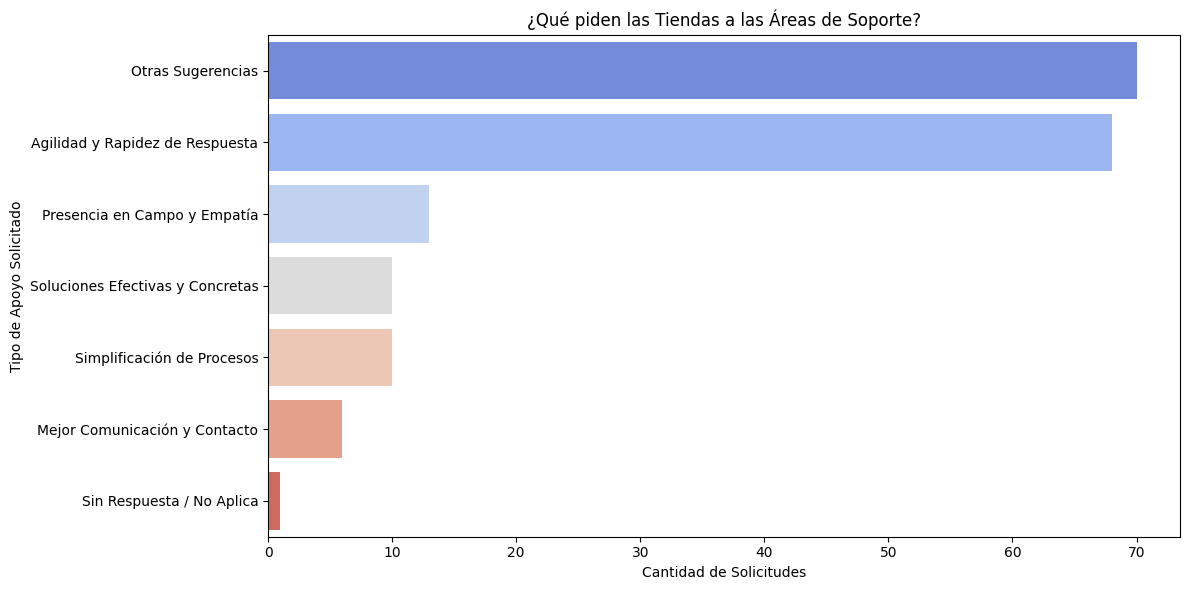

In [ ]:
# ==========================================
# PASO 4: VISUALIZACIÓN
# ==========================================
plt.figure(figsize=(12, 6))
sns.countplot(y='Categoria_Apoyo_Areas', data=df,
              order=conteo.index,
              palette='coolwarm')
plt.title('¿Qué piden las Tiendas a las Áreas de Soporte?')
plt.xlabel('Cantidad de Solicitudes')
plt.ylabel('Tipo de Apoyo Solicitado')
plt.tight_layout()
plt.show()

In [ ]:
# ==========================================
# PASO 5: EXPORTAR A EXCEL
# ==========================================
# The 'conteo' variable is used in the previous cell for plotting, so it's safe to assume 'cols_candidatas' was true.
# We will re-check the condition for robustness.
if 'cols_candidatas' in globals() and cols_candidatas:
    nombre_archivo = "Analisis_Apoyo_Areas.xlsx"
    df.to_excel(nombre_archivo, index=False)
    files.download(nombre_archivo)
    print(f"\n¡Archivo '{nombre_archivo}' listo y descargado!")
else:
    print("ERROR: No se encontró la columna. Verifica que contenga la palabra 'apoyaran' o 'necesidades'.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¡Archivo 'Analisis_Apoyo_Areas.xlsx' listo y descargado!


In [ ]:
# ==========================================
# PASO EXTRACCIÓN NUMÉRICA - TIENDAS A VISITAR
# ==========================================

def extraer_numero_puro(text):
    """Busca el primer número entero en la respuesta y lo devuelve tal cual"""
    if not isinstance(text, str):
        return None

    # Normalizar texto (convertir palabras comunes a números por si acaso)
    text = text.lower()
    text = text.replace("una", "1").replace("dos", "2").replace("tres", "3")

    # Regex para encontrar dígitos
    match = re.search(r'\d+', text)
    if match:
        return int(match.group())
    return None

In [ ]:
# ==========================================
# PASO EJECUCIÓN - TIENDAS A VISITAR
# ==========================================

col_ideal = "¿ Cual sería la cantidad de tiendas ideal para cumplir con tus rutinas de trabajo?"

# Búsqueda flexible de la columna
if col_ideal not in df.columns:
    candidatas = [c for c in df.columns if "cantidad de tiendas ideal" in c.lower()]
    if candidatas:
        col_ideal = candidatas[0]

if col_ideal in df.columns:
    print(f"\nProcesando columna: {col_ideal}...")

    # Extraer el número puro
    df['Cantidad_Tiendas_Ideal'] = df[col_ideal].apply(extraer_numero_puro)

    # Mostrar tabla de frecuencias
    conteo = df['Cantidad_Tiendas_Ideal'].value_counts().sort_index()
    print("\n--- FRECUENCIA DE RESPUESTAS (POR NÚMERO) ---")
    print(conteo)


Procesando columna: ¿ Cual sería la cantidad de tiendas ideal para cumplir con tus rutinas de trabajo?...

--- FRECUENCIA DE RESPUESTAS (POR NÚMERO) ---
Cantidad_Tiendas_Ideal
1.0      9
2.0     13
4.0      1
5.0      7
6.0     17
7.0     36
8.0     73
9.0      4
40.0     7
41.0     1
45.0     2
50.0     4
Name: count, dtype: int64


/tmp/ipython-input-3323603208.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cantidad_Tiendas_Ideal', data=df, palette='viridis')


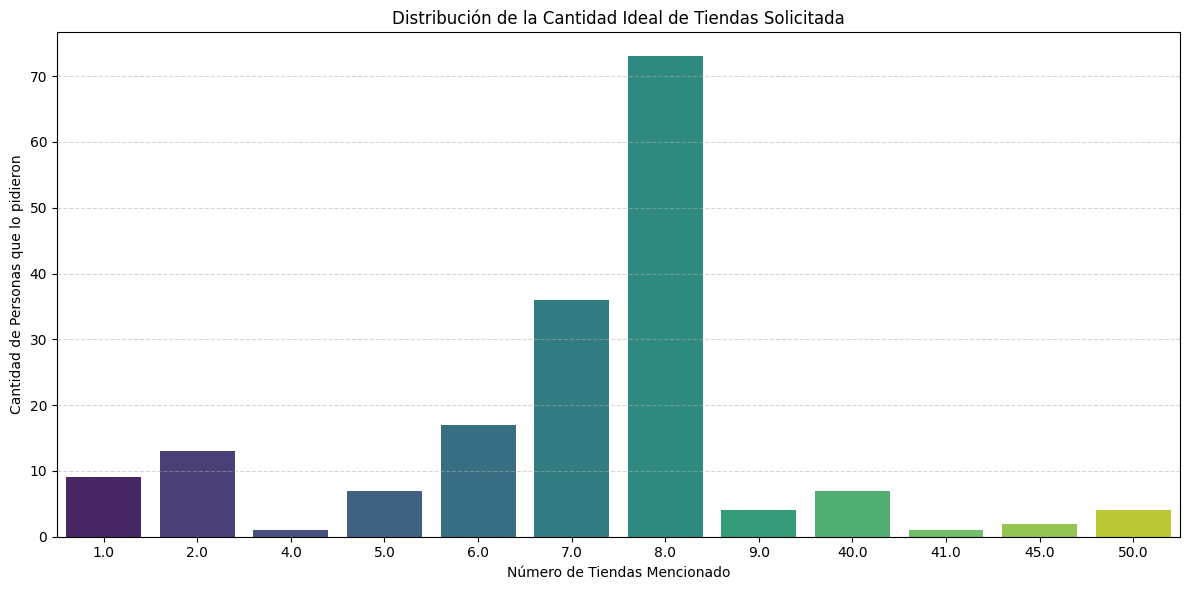

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¡Archivo 'Analisis_Cantidad_Tiendas_Numerico.xlsx' descargado!


In [ ]:
# ==========================================
# PASO 4: VISUALIZACIÓN
# ==========================================
if col_ideal in df.columns:
    plt.figure(figsize=(12, 6))

    # Graficamos la frecuencia de cada número mencionado
    sns.countplot(x='Cantidad_Tiendas_Ideal', data=df, palette='viridis')

    plt.title('Distribución de la Cantidad Ideal de Tiendas Solicitada')
    plt.xlabel('Número de Tiendas Mencionado')
    plt.ylabel('Cantidad de Personas que lo pidieron')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # ==========================================
    # PASO 5: EXPORTAR A EXCEL
    # ==========================================
    nombre_archivo = "Analisis_Cantidad_Tiendas_Numerico.xlsx"
    df.to_excel(nombre_archivo, index=False)
    files.download(nombre_archivo)
    print(f"\n¡Archivo '{nombre_archivo}' descargado!")

else:
    print("ERROR: No se encontró la columna. Verifica el nombre exacto.")

In [ ]:
# ==========================================
# PASO DEFINIR CATEGORÍAS DE AUTOMATIZACIÓN
# ==========================================

def normalizar(text):
    if not isinstance(text, str):
        return ""
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8').lower()

def categorizar_automatizacion(text):
    """Clasifica qué tarea piden automatizar"""
    if not isinstance(text, str) or len(text) < 3:
        return 'Sin Respuesta'

    t = normalizar(text)

    # 1. TIMESOFT / NÓMINA (El dolor más grande)
    if any(x in t for x in ['timesoft', 'time soft', 'nomina', 'malla', 'horario', 'marcacion', 'horas extra', 'biometrico', 'turno']):
        return 'Gestión de Tiempos (TimeSoft)'

    # 2. COA / AUDITORÍAS
    if any(x in t for x in ['coa', 'auditoria', 'checklist', 'control', 'revision', 'formato de calidad']):
        return 'COA y Auditorías'

    # 3. INFORMES Y REPORTES (Burocracia)
    if any(x in t for x in ['informe', 'reporte', 'consolidado', 'excel', 'dato', 'kpi', 'indicadores', 'llenar']):
        return 'Elaboración de Informes'

    # 4. CORREOS Y COMUNICACIÓN
    if any(x in t for x in ['correo', 'mail', 'bandeja', 'leer', 'mensaje']):
        return 'Gestión de Correos'

    # 5. ENCUESTAS Y FORMULARIOS
    if any(x in t for x in ['encuesta', 'forms', 'link', 'formulario', 'solicitud']):
        return 'Encuestas y Formularios'

    # 6. NADA / TODO ESTÁ BIEN
    if any(x in t for x in ['nada', 'ninguna', 'todo bien', 'no aplica']):
        return 'Ninguna / No sabe'

    return 'Otras Tareas Administrativas'

In [ ]:
# ==========================================
# PASO 3: EJECUTAR ANÁLISIS
# ==========================================

col_auto = "¿Qué actividades te gustaría automatizar, reducir o simplificar?"

# Verificación de nombre exacto
if col_auto not in df.columns:
    candidatas = [c for c in df.columns if "automatizar" in c.lower()]
    if candidatas:
        col_auto = candidatas[0]

if col_auto in df.columns:
    print(f"\nProcesando columna: {col_auto}...")

    # Crear Categoría
    df['Categoria_Automatizar'] = df[col_auto].apply(categorizar_automatizacion)

    # Mostrar Conteo
    conteo = df['Categoria_Automatizar'].value_counts()
    print("\n--- ¿QUÉ QUIEREN AUTOMATIZAR? ---")
    print(conteo)


Procesando columna: ¿Qué actividades te gustaría automatizar, reducir o simplificar?...

--- ¿QUÉ QUIEREN AUTOMATIZAR? ---
Categoria_Automatizar
Gestión de Tiempos (TimeSoft)    49
Otras Tareas Administrativas     46
COA y Auditorías                 43
Elaboración de Informes          21
Encuestas y Formularios          12
Gestión de Correos                4
Ninguna / No sabe                 3
Name: count, dtype: int64


/tmp/ipython-input-3770770327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Categoria_Automatizar', data=df,


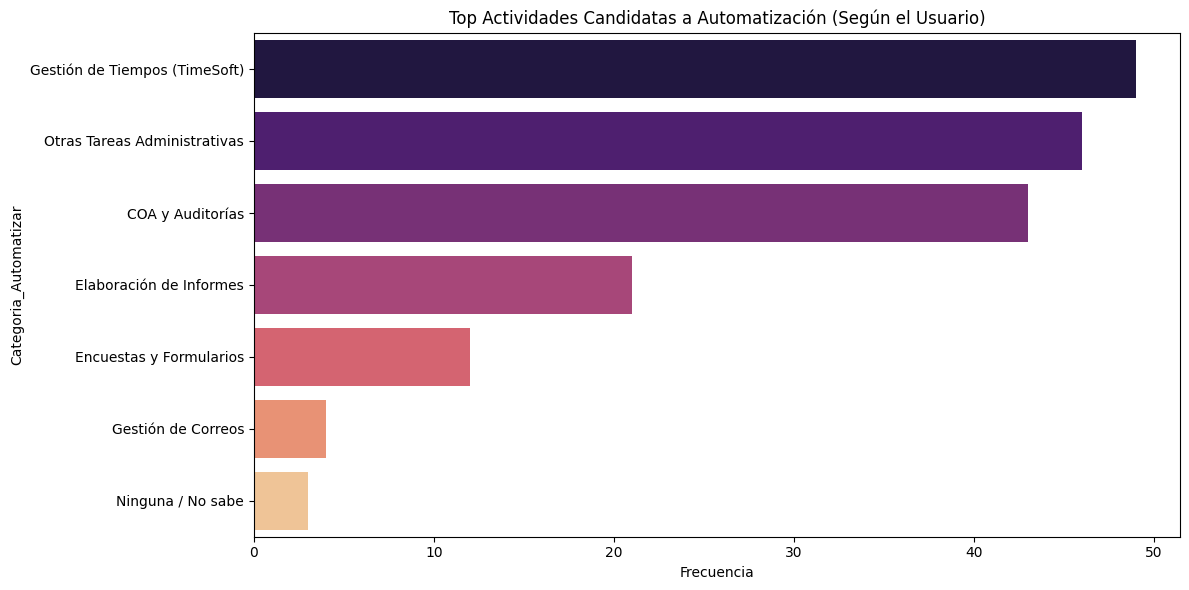

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¡Archivo 'Analisis_Automatizacion.xlsx' descargado!


In [ ]:
# ==========================================
# PASO 4: VISUALIZACIÓN
# ==========================================
if col_auto in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Categoria_Automatizar', data=df,
                  order=conteo.index,
                  palette='magma')
    plt.title('Top Actividades Candidatas a Automatización (Según el Usuario)')
    plt.xlabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # ==========================================
    # PASO 5: EXPORTAR A EXCEL
    # ==========================================
    nombre_archivo = "Analisis_Automatizacion.xlsx"
    df.to_excel(nombre_archivo, index=False)
    files.download(nombre_archivo)
    print(f"\n¡Archivo '{nombre_archivo}' descargado!")

else:
    print("ERROR: No se encontró la columna. Verifica el nombre exacto.")

In [ ]:
# ==========================================
# PASO DEFINIR CATEGORÍAS DE CAMBIO
# ==========================================

def normalizar(text):
    if not isinstance(text, str): return ""
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8').lower()

def categorizar_cambio_rol(text):
    """Clasifica qué desearían cambiar de su trabajo"""
    if not isinstance(text, str) or len(text) < 3:
        return 'Sin Respuesta'

    t = normalizar(text)

    # 1. HERRAMIENTAS (El gran dolor detectado: Falta PC)
    # Palabras clave: computador, portatil, pc, laptop, herramienta, equipo, celular, tablet
    if any(x in t for x in ['computador', 'pc', 'portatil', 'laptop', 'herramienta tecnologica', 'equipo de computo']):
        return 'Dotación de Herramientas (Computador)'

    # 2. CARGA ADMINISTRATIVA (Burocracia)
    # Palabras clave: correos, administrativo, areas, informes, reuniones, burocracia, operatividad manual
    if any(x in t for x in ['administrativ', 'correo', 'papel', 'informe', 'reunion', 'tantas areas', 'menos escritorio', 'burocracia']):
        return 'Menor Carga Administrativa'

    # 3. BALANCE VIDA - TRABAJO (Descanso)
    # Palabras clave: domingo, festivo, descanso, tiempo libre, familia, horario, fin de semana, desconexion
    if any(x in t for x in ['domingo', 'descanso', 'tiempo libre', 'vida personal', 'familia', 'horario', 'fin de semana', 'festivo', 'presion']):
        return 'Balance Vida-Trabajo y Horarios'

    # 4. ALCANCE Y ZONA (Cantidad de Tiendas)
    # Palabras clave: cantidad de tiendas, menos tiendas, zona, cobertura, desplazamiento, numero de tiendas
    if any(x in t for x in ['cantidad de tiendas', 'menos tiendas', 'numero de tiendas', 'cobertura', 'muchas tiendas', 'zonas mas pequeñas']):
        return 'Reducción de Tiendas / Zona'

    # 5. PROCESOS ESPECÍFICOS (Nómina, Inventario)
    # Palabras clave: nomina, timesoft, inventario, auditoria
    if any(x in t for x in ['nomina', 'timesoft', 'inventario', 'auditoria', 'proceso']):
        return 'Mejora de Procesos Operativos'

    # 6. NADA / SATISFECHO
    if any(x in t for x in ['nada', 'ninguna', 'conforme', 'todo bien', 'no cambiaria']):
        return 'Ninguna / Satisfecho con el Rol'

    return 'Otros Cambios'

In [ ]:
# ==========================================
# PASO 3: EJECUCIÓN DEL ANÁLISIS
# ==========================================

col_cambio = "¿ Si pudieras cambiar una sola cosa del rol cuál sería?"

# Búsqueda flexible por si hay espacios extra
if col_cambio not in df.columns:
    candidatas = [c for c in df.columns if "cambiar una sola cosa" in c.lower()]
    if candidatas:
        col_cambio = candidatas[0]

if col_cambio in df.columns:
    print(f"\nProcesando columna: {col_cambio}...")

    # Aplicar categorización
    df['Categoria_Cambio_Rol'] = df[col_cambio].apply(categorizar_cambio_rol)

    # Mostrar conteo
    conteo = df['Categoria_Cambio_Rol'].value_counts()
    print("\n--- ¿QUÉ QUIEREN CAMBIAR? ---")
    print(conteo)


Procesando columna: ¿ Si pudieras cambiar una sola cosa del rol cuál sería?...

--- ¿QUÉ QUIEREN CAMBIAR? ---
Categoria_Cambio_Rol
Otros Cambios                            84
Ninguna / Satisfecho con el Rol          26
Mejora de Procesos Operativos            17
Menor Carga Administrativa               16
Balance Vida-Trabajo y Horarios          13
Dotación de Herramientas (Computador)    12
Sin Respuesta                             7
Reducción de Tiendas / Zona               3
Name: count, dtype: int64


/tmp/ipython-input-1537639856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Categoria_Cambio_Rol', data=df,


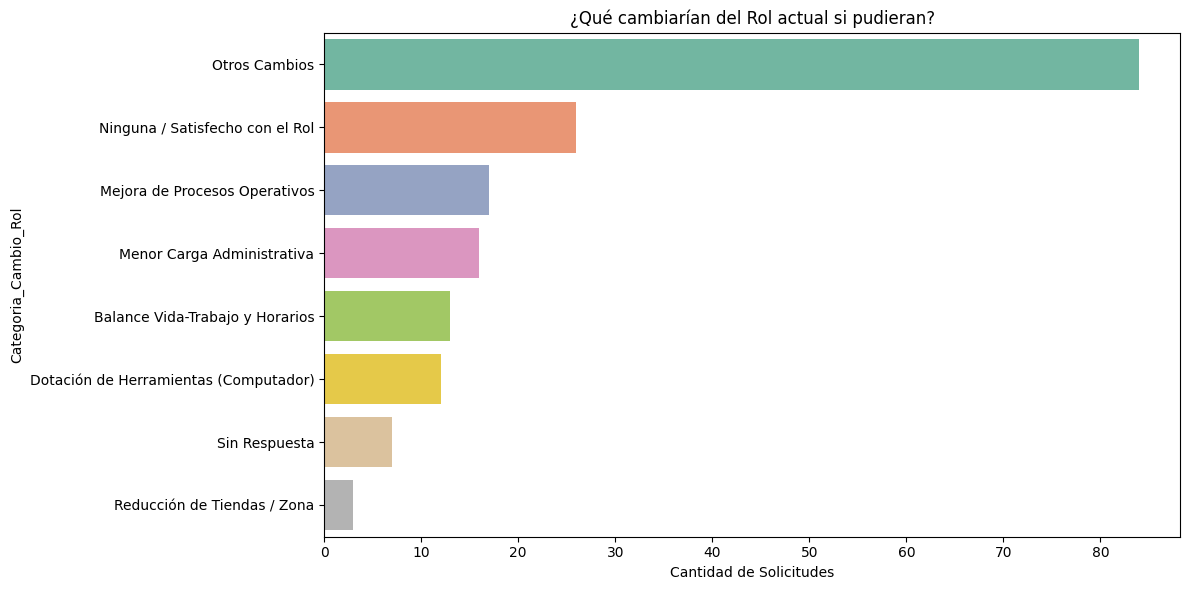

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¡Archivo 'Analisis_Cambio_Rol.xlsx' descargado!


In [ ]:
# ==========================================
# PASO 4: VISUALIZACIÓN
# ==========================================
if col_cambio in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Categoria_Cambio_Rol', data=df,
                  order=conteo.index,
                  palette='Set2')
    plt.title('¿Qué cambiarían del Rol actual si pudieran?')
    plt.xlabel('Cantidad de Solicitudes')
    plt.tight_layout()
    plt.show()

    # ==========================================
    # PASO 5: EXPORTAR A EXCEL
    # ==========================================
    nombre_archivo = "Analisis_Cambio_Rol.xlsx"
    df.to_excel(nombre_archivo, index=False)
    files.download(nombre_archivo)
    print(f"\n¡Archivo '{nombre_archivo}' descargado!")

else:
    print("ERROR: No se encontró la columna. Verifica el nombre exacto en el archivo.")

In [ ]:
# ==========================================
# PASO DETECTAR SUB-DOLORES EN "OTROS"
# ==========================================

def profundizacion_dolores(text):
    if not isinstance(text, str) or len(text) < 3:
        return 'Sin Información'

    t = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8').lower()

    # 1. AUTONOMÍA Y TOMA DE DECISIONES
    if any(x in t for x in ['autonomia', 'decidir', 'entrevista', 'contratar', 'poder hacer', 'criterio']):
        return 'Falta de Autonomía (Ej: Contratación)'

    # 2. PROCESOS CRÍTICOS ESPECÍFICOS (Sistemas antiguos)
    if any(x in t for x in ['sap', 'cedi', 'ojo de dios', 'logistica', 'pedidos', 'recepcion']):
        return 'Falla en Procesos Críticos (Sistemas/CEDI)'

    # 3. SEGURIDAD Y ENTES EXTERNOS
    if any(x in t for x in ['seguridad', 'hurtos', 'robo', 'entes', 'policia', 'control externo']):
        return 'Preocupación por Seguridad / Hurtos'

    # 4. CAPACITACIÓN Y DESARROLLO
    if any(x in t for x in ['capacitacion', 'entrenar', 'presencial', 'aprender', 'escuela']):
        return 'Necesidad de Capacitación Presencial'

    # 5. ESTRUCTURA Y ROLES
    if any(x in t for x in ['rol', 'funciones', 'estructura', 'jerarquia', 'jefe de zona', 'responsabilidad']):
        return 'Ambigüedad de Rol / Funciones'

    return 'Otros Dolores Puntuales'

In [ ]:
# ==========================================
# PASO EJECUCIÓN DEL ANÁLISIS PROFUNDO
# ==========================================

# Filtramos solo aquellos que cayeron en "Otros Cambios" previamente
if 'Categoria_Cambio_Rol' in df.columns:
    df['Sub_Dolor_Detallado'] = df.apply(
        lambda row: profundizacion_dolores(row['¿ Si pudieras cambiar una sola cosa del rol cuál sería?'])
        if row['Categoria_Cambio_Rol'] == 'Otros Cambios' else 'Categorizado Previamente', axis=1
    )

    # Filtrar para mostrar solo los nuevos hallazgos en el gráfico
    df_otros = df[df['Sub_Dolor_Detallado'] != 'Categorizado Previamente']

    conteo_profundo = df_otros['Sub_Dolor_Detallado'].value_counts()
    print("\n--- DESGLOSE DE OTROS DOLORES ENCONTRADOS ---")
    print(conteo_profundo)


--- DESGLOSE DE OTROS DOLORES ENCONTRADOS ---
Sub_Dolor_Detallado
Otros Dolores Puntuales                       66
Ambigüedad de Rol / Funciones                  9
Necesidad de Capacitación Presencial           3
Falla en Procesos Críticos (Sistemas/CEDI)     3
Falta de Autonomía (Ej: Contratación)          3
Name: count, dtype: int64


/tmp/ipython-input-4207271400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_profundo.values, y=conteo_profundo.index, palette='Reds_r')


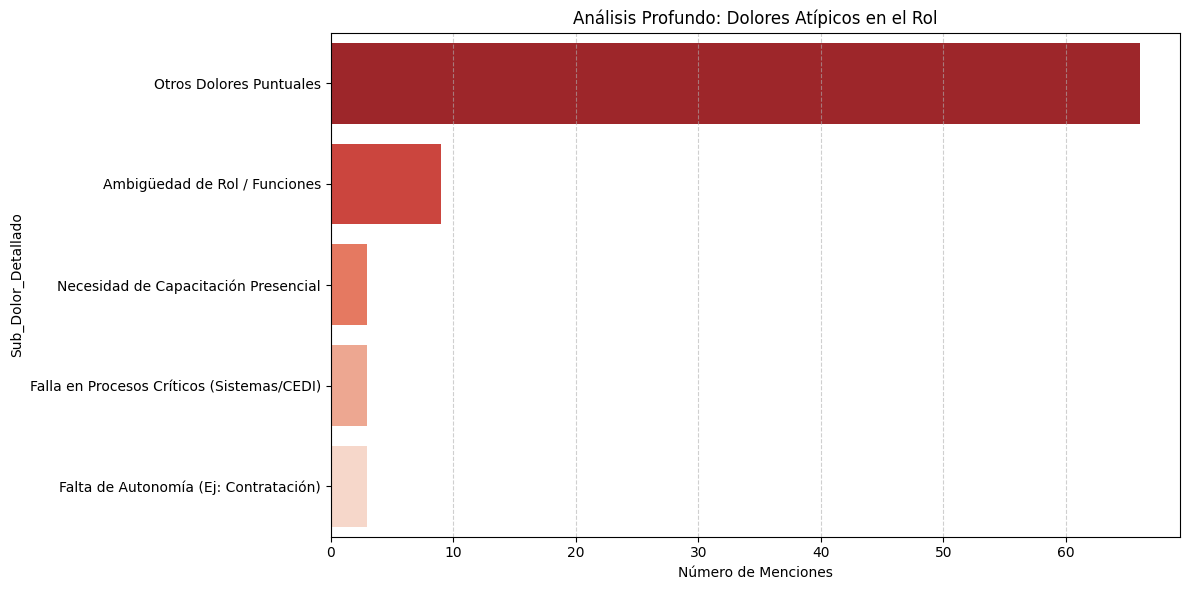

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==========================================
# PASO 3: VISUALIZACIÓN DE PROFUNDIDAD
# ==========================================
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_profundo.values, y=conteo_profundo.index, palette='Reds_r')
plt.title('Análisis Profundo: Dolores Atípicos en el Rol')
plt.xlabel('Número de Menciones')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Guardar reporte detallado
df.to_excel("Analisis_Profundo_Dolores.xlsx", index=False)
files.download("Analisis_Profundo_Dolores.xlsx")